In [1]:
from IPython.core.debugger import set_trace

%load_ext nb_black

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

<IPython.core.display.Javascript object>

In [17]:
movies = pd.read_csv(
    "https://data-bootcamp-ztc.s3.amazonaws.com/movies_complete_cleaned.csv"
)

awards = pd.read_csv(
    "https://data-bootcamp-ztc.s3.amazonaws.com/parsed_awards_table.csv"
)

movies_sel = movies[["name", "plot"]]

awards_sel = awards[["name", "oscar wins and nominations"]]

df = pd.merge(movies_sel, awards_sel, how="right", on="name")

df["oscar_nom"] = [1 if x != 0 else 0 for x in df["oscar wins and nominations"]]

df = df[["name", "plot", "oscar_nom"]]

df["plot"].fillna("", inplace=True)

df.head()

,name,plot,oscar_nom
0,Gold,"With the sudden death of his father, fourth-ge...",0
1,The Choice,"In a small coastal town, the veterinarian Trav...",0
2,Middle School: The Worst Years of My Life,Imaginative quiet teenager Rafe Katchadorian i...,0
3,Midnight Special,Alton Meyer is a boy unlike any other in the w...,0
4,A Monster Calls,The monster does not come walking often. This ...,0


<IPython.core.display.Javascript object>

In [24]:
from sklearn.model_selection import train_test_split

X = df["plot"].values.reshape(-1, 1)
y = df["oscar_nom"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

<IPython.core.display.Javascript object>

### EDA

Handling missing values straight from the start.

In [6]:
X_train.fillna(-99, inplace=True)
X_test.fillna(-99, inplace=True)

<IPython.core.display.Javascript object>

Plotting the distribution of the target variable.

<BarContainer object of 2 artists>

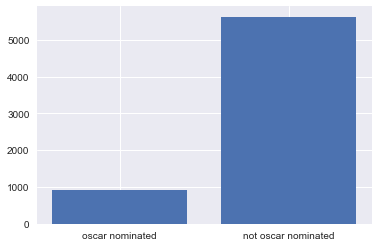

<IPython.core.display.Javascript object>

In [25]:
oscar = df[df.oscar_nom == 1].shape[0]
non_oscar = df[df.oscar_nom == 0].shape[0]
plt.bar(["oscar nominated", "not oscar nominated"], [oscar, non_oscar])

In [47]:
def plot_target_based_features(feature):
    x1 = df[df["oscar_nom"] == 1][feature]
    x2 = df[df["oscar_nom"] == 0][feature]
    plt.figure(1, figsize=(16, 8))
    plt.subplot(1, 1, 1)
    _ = plt.hist(x2, alpha=0.5, color="grey", bins=50)
    _ = plt.hist(x1, alpha=0.7, color="red", bins=50)

    return _

<IPython.core.display.Javascript object>

Check the number of characters in the text feature.

In [45]:
df["text_len"] = [len(x) if type(x) == str else 0 for x in df["plot"]]


df

,name,plot,oscar_nom,text_len
0,Gold,"With the sudden death of his father, fourth-ge...",0,841
1,The Choice,"In a small coastal town, the veterinarian Trav...",0,628
2,Middle School: The Worst Years of My Life,Imaginative quiet teenager Rafe Katchadorian i...,0,294
3,Midnight Special,Alton Meyer is a boy unlike any other in the w...,0,651
4,A Monster Calls,The monster does not come walking often. This ...,0,445
...,...,...,...,...
6550,The Karate Kid Part II,Picks up where the first movie (Karate Kid) le...,1,362
6551,Mona Lisa,"George, after getting out of prison, begins lo...",1,448
6552,Ginger and Fred,Amelia and Pippo are reunited after several de...,0,350
6553,Critters,A massive ball of furry creatures from another...,0,178


<IPython.core.display.Javascript object>

In [34]:
len(df.loc[0, "plot"])

841

<IPython.core.display.Javascript object>

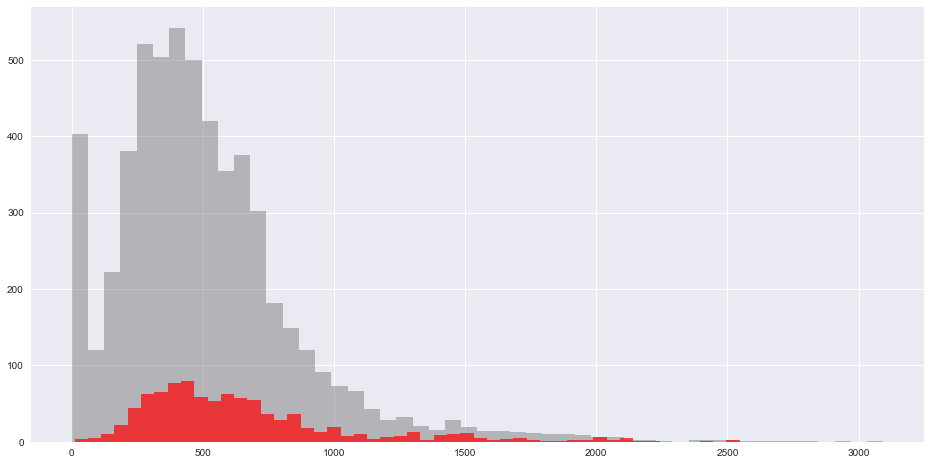

<IPython.core.display.Javascript object>

In [48]:
_ = plot_target_based_features("text_len")

Check the number number of words in the text feature.

In [50]:
df["words_count"] = [len(x.split()) if type(x) == str else 0 for x in df["plot"]]

<IPython.core.display.Javascript object>

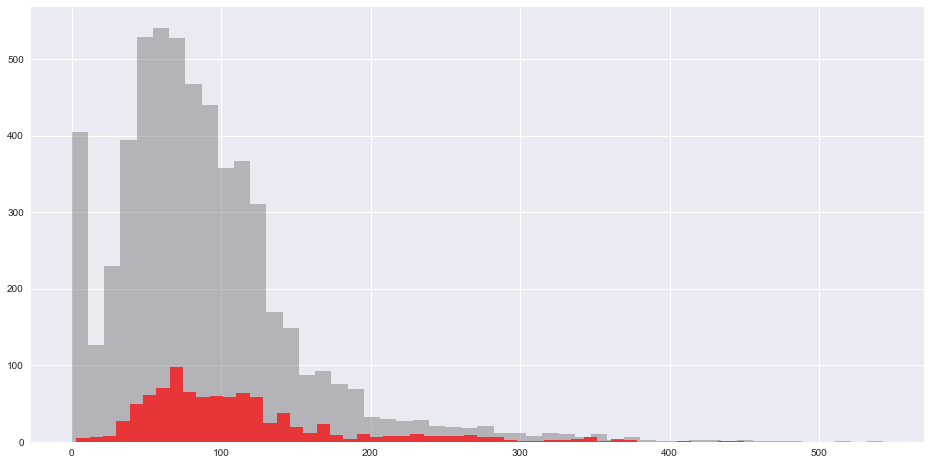

<IPython.core.display.Javascript object>

In [51]:
_ = plot_target_based_features("words_count")

Count the number of unique words

In [53]:
df["unique_word_count"] = [
    len(set(str(x).split())) if type(x) == str else 0 for x in df["plot"]
]

<IPython.core.display.Javascript object>

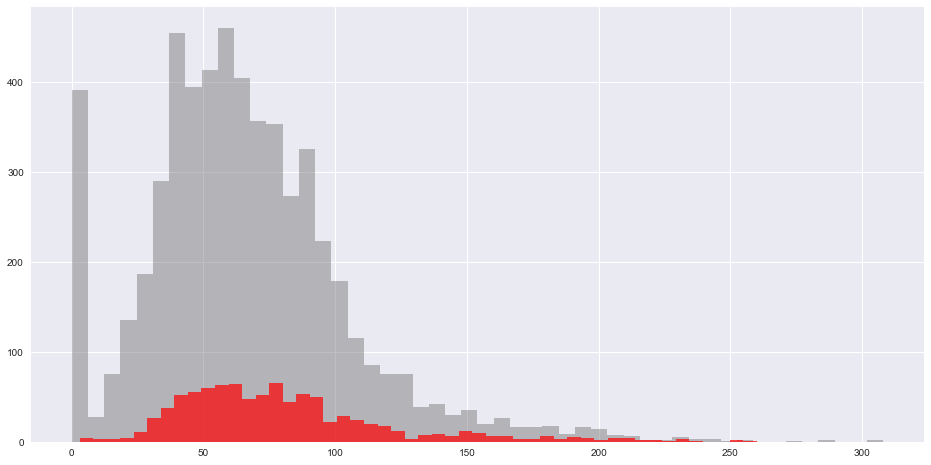

<IPython.core.display.Javascript object>

In [54]:
_ = plot_target_based_features("unique_word_count")

Mean word length

In [55]:
df["mean_word_length"] = [
    np.mean([len(w) for w in str(x).split()]) if type(x) == str else 0
    for x in df["plot"]
]

<IPython.core.display.Javascript object>

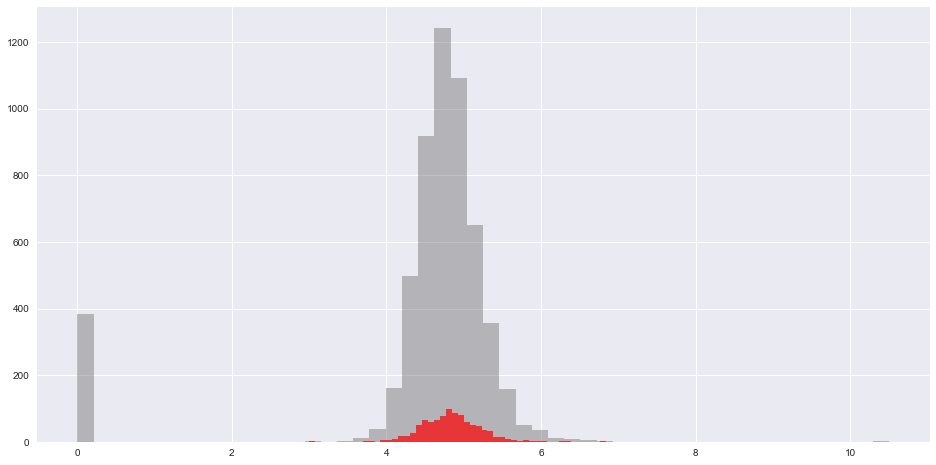

<IPython.core.display.Javascript object>

In [56]:
_ = plot_target_based_features("mean_word_length")

Punctuation count

In [22]:
import string

train["punctuation_count"] = train["text"].map(
    lambda x: len([c for c in str(x) if c in string.punctuation])
)

<IPython.core.display.Javascript object>

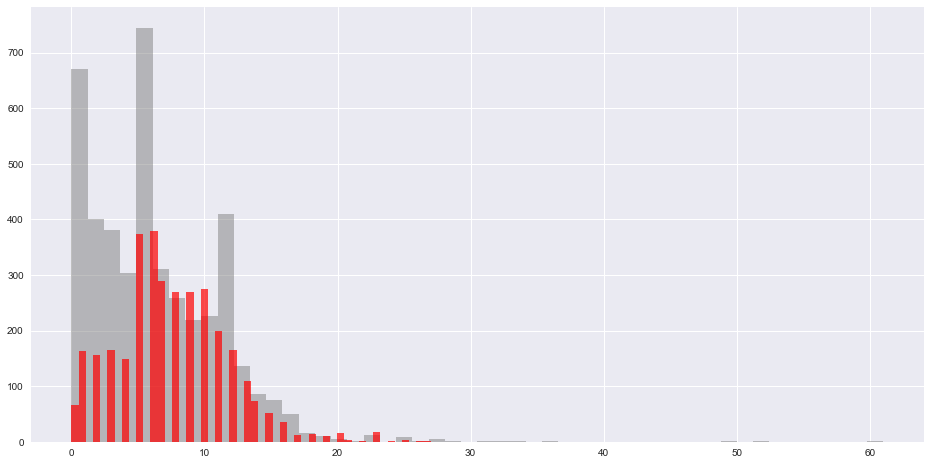

<IPython.core.display.Javascript object>

In [23]:
_ = plot_target_based_features("punctuation_count")

Looking at the plots above we can see that the new generated features have different distributions for the two target categories.

Therefore these features might be useful in models that we can try.